# **Mileage Prediction-Regression Analysis**

-------------

## **Objective**

To Predict the Mileage of a Car

## **Data Source**

This Dataset is taken by StatLib Library Which is maintained By carneige mellon University

## **Import Library**

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score


## **Import Data**

In [2]:
df=pd.read_csv("/content/sample_data/MPG.csv")

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
df.nunique()

,0
mpg,129
cylinders,5
displacement,82
horsepower,93
weight,351
acceleration,95
model_year,13
origin,3
name,305


## **Describe Data**

In [6]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


## **Data Visualization**

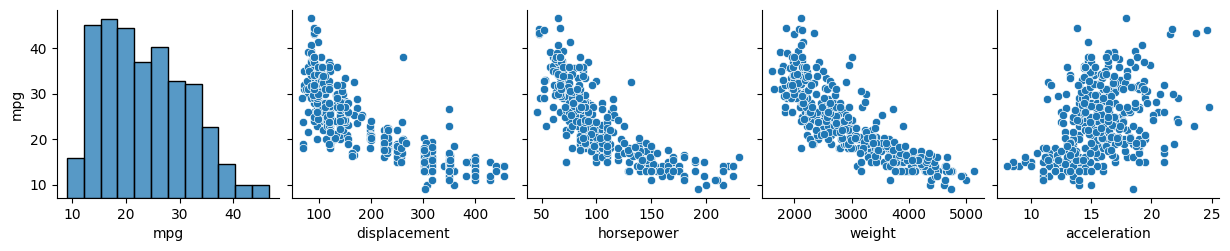

In [19]:
sns.pairplot(df,x_vars=['mpg','displacement','horsepower','weight','acceleration'],y_vars=['mpg'])

<Axes: xlabel='mpg', ylabel='displacement'>

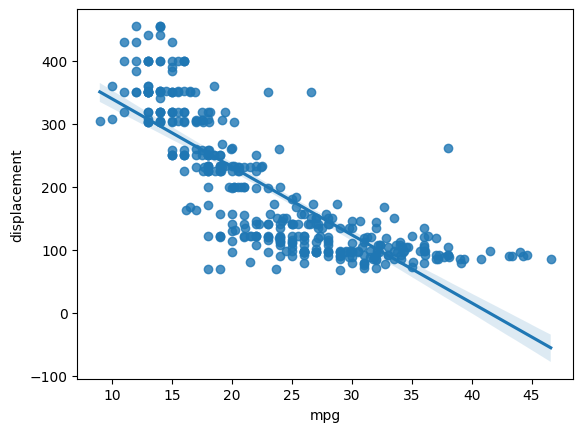

In [20]:
sns.regplot(x='mpg',y='displacement',data=df)

## **Data Preprocessing**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [14]:
df_corr = df.drop(['origin', 'name'], axis=1)
correlation_matrix = df_corr.corr()
df_corr.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


# Remove Missing Value

In [15]:
df= df.dropna()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


## **Define Target Variable (y) and Feature Variables (X)**

In [23]:
X=df.drop(['mpg','name','origin'],axis=1)
y=df['mpg']

In [25]:
X.shape,y.shape

((392, 6), (392,))

In [26]:
x

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82
394,4,97.0,52.0,2130,24.6,82
395,4,135.0,84.0,2295,11.6,82
396,4,120.0,79.0,2625,18.6,82


#Scaling Data Set

In [30]:
ss= StandardScaler()
X=ss.fit_transform(X)
X

array([[ 1.48394702,  1.07728956,  0.66413273,  0.62054034, -1.285258  ,
        -1.62531533],
       [ 1.48394702,  1.48873169,  1.57459447,  0.84333403, -1.46672362,
        -1.62531533],
       [ 1.48394702,  1.1825422 ,  1.18439658,  0.54038176, -1.64818924,
        -1.62531533],
       ...,
       [-0.86401356, -0.56847897, -0.53247413, -0.80463202, -1.4304305 ,
         1.63640964],
       [-0.86401356, -0.7120053 , -0.66254009, -0.41562716,  1.11008813,
         1.63640964],
       [-0.86401356, -0.72157372, -0.58450051, -0.30364091,  1.40043312,
         1.63640964]])

In [32]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5
count,3.920000e+02,392.000000,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,0.000000,1.812609e-17,-1.812609e-17,-1.812609e-17,-1.450087e-16
std,1.001278e+00,1.001278,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.451004e+00,-1.209563,-1.520975e+00,-1.608575e+00,-2.736983e+00,-1.625315e+00
25%,-8.640136e-01,-0.855532,-7.665929e-01,-8.868535e-01,-6.410551e-01,-8.098841e-01
50%,-8.640136e-01,-0.415384,-2.853488e-01,-2.052109e-01,-1.499869e-02,5.547151e-03
75%,1.483947e+00,0.778276,5.600800e-01,7.510927e-01,5.384714e-01,8.209784e-01
max,1.483947e+00,2.493416,3.265452e+00,2.549061e+00,3.360262e+00,1.636410e+00


## **Train Test Split**

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((274, 6), (118, 6), (274,), (118,))

## **Modeling**

In [35]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [36]:
lr.intercept_

23.58503514691566

In [37]:
lr.coef_

array([-0.15768632,  0.03337779, -0.36033138, -5.41147167,  0.1774829 ,
        2.68153598])

## **Prediction**

In [38]:
y_pred=lr.predict(X_test)
y_pred

array([26.31050971, 26.24667456, 33.14488022, 27.22440462, 29.46550187,
       29.28389189,  7.66404492, 29.42701039, 21.1231744 , 29.36858154,
       12.23470009, 23.80655125, 16.26874891, 28.42719194, 21.98956832,
       30.87559458, 21.45129619, 31.71360155, 28.05590416, 29.80098707,
       20.18737079, 34.56036778, 34.05061032, 15.20319734, 29.06219757,
       26.19733355, 21.20662016, 16.96542107, 28.97312287, 24.19882411,
       12.87870775, 23.78065106, 21.34607145, 30.0053973 , 11.10814518,
       34.73794534, 11.0471502 , 26.54534821, 11.78380697,  7.4650836 ,
       13.00060451, 28.06576046, 34.71451615, 26.75068294, 11.43444461,
        8.71851254, 17.98957713, 31.57479656, 25.76957248, 30.57744654,
       11.68076577, 25.34346015, 24.75938746, 33.38831804, 28.72102568,
       18.04557897, 20.92253424, 23.31121309, 23.39290664, 24.83692246,
        7.25169314, 23.14605999, 27.23268168, 23.36315904, 28.16645706,
       28.8512881 , 26.96492867, 29.83569432, 22.31874769,  9.13

# Model Accuracy

In [41]:
mean_absolute_error(y_test,y_pred)

2.5402870152705255

In [42]:
mean_absolute_percentage_error(y_test,y_pred)

0.12443680540095779

In [43]:
r2_score(y_test,y_pred)

0.8076704419810161

#polynomial Regression

In [44]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)
X_train2=poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

In [45]:
lr.fit(X_train2,y_train)

LinearRegression()

In [46]:
lr.intercept_

21.37670811434188

In [47]:
lr.coef_

array([ 1.25093358, -2.2883909 , -3.16942914, -3.96240872, -0.9532334 ,
        2.69903765, -2.05927581,  2.14099539, -0.03994814,  1.47873448,
       -0.80159092, -0.5770005 ,  3.39221368, -1.7812051 ,  2.24471412,
       -1.18012088, -0.83347882, -1.02378241,  0.70679857, -0.83792552,
        0.57909133])

In [48]:
y_pred_poly=lr.predict(X_test2)

In [49]:
y_pred_poly

array([26.31396428, 21.69911207, 36.04209416, 25.65789966, 28.70522298,
       30.02808266, 12.68624935, 29.82259155, 19.71790002, 32.41390397,
       16.99384606, 22.93650381, 15.26744319, 29.19341439, 18.25369225,
       29.55166605, 20.13887399, 32.5904954 , 27.92580077, 28.94398988,
       18.16513942, 40.80212188, 36.54110256, 14.14865239, 31.3734819 ,
       26.07758598, 18.56416625, 15.69147309, 29.62046535, 22.54977821,
       14.07287153, 22.78808848, 19.06535402, 30.71428726, 14.14180621,
       37.49017387, 13.30559783, 26.20408472, 12.82415727,  9.38857755,
       13.74872074, 29.29337619, 36.59206486, 27.7612724 , 13.9975826 ,
       13.40900644, 15.4866347 , 33.49672432, 22.55200932, 32.75906688,
       11.9677484 , 24.22704938, 22.30431656, 33.36096672, 26.05922408,
       15.03411008, 18.45255986, 20.10024455, 21.41390401, 24.94439207,
       13.20140329, 20.91544423, 25.08240156, 21.76340104, 26.62253353,
       28.13244044, 25.80265022, 32.04712025, 20.18806945, 14.08

In [50]:
mean_absolute_error(y_test,y_pred_poly)

1.9745127573427357

In [51]:
mean_absolute_percentage_error(y_test,y_pred_poly)

0.08920614244324636

In [53]:
r2_score(y_test,y_pred_poly)

0.8588965513783124

## **Explaination**


## Model Performance

The linear regression model achieved an R-squared value of ***0.8077***. The Mean Absolute Error (MAE) was ***2.5402870152705255***, representing the average difference between predicted and actual MPG values. The Mean Absolute Percentage Error (MAPE) was ***0.1244 %***, providing a relative measure of prediction accuracy.

## Feature Importance

By analyzing the coefficients of the linear regression model, we can understand which features had the most significant influence on the prediction of MPG. For example, a positive coefficient for 'displacement' suggests that as displacement increases, MPG is likely to decrease, and vice versa. The magnitude of the coefficient indicates the strength of this relationship.


By continuing to refine the model and further investigate the data, we can gain a deeper understanding of the factors influencing car mileage.
